<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/db_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0    842302        17.99  ...                  0.11890          NaN
1    842517        20.57  ...                  0.08902          NaN
2  84300903        19.69  ...                  0.08758          NaN
3  84348301        11.42  ...                  0.17300          NaN
4  84358402        20.29  ...                  0.07678          NaN

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Let's first check the data types 
df.dtypes

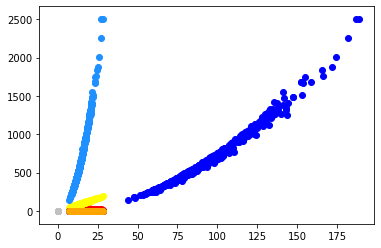

In [17]:
# Let's start comparing some columns using a scatter graph to find any possible clusters
plt.scatter(df['perimeter_mean'], df['area_mean'], c='b')
plt.scatter(df['smoothness_mean'], df['compactness_mean'], c='g')
plt.scatter(df['concavity_mean'], df['concave points_mean'], c='gold')
plt.scatter(df['symmetry_mean'], df['fractal_dimension_mean'], c='silver')

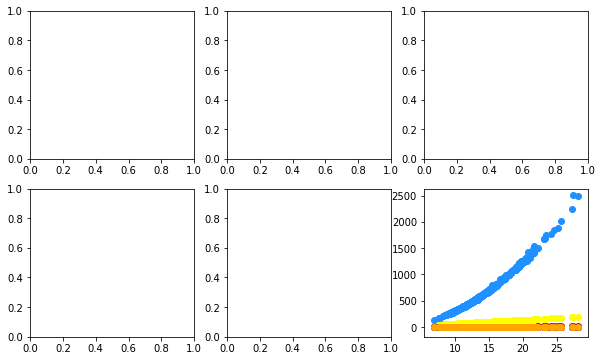

In [75]:
fig, axes = plt.subplots(2,3,figsize=(10, 6))

plt.scatter(df['radius_mean'], df['texture_mean'], c='r')
plt.scatter(df['radius_mean'], df['perimeter_mean'], c='yellow')
plt.scatter(df['radius_mean'], df['area_mean'], c='dodgerblue')
plt.scatter(df['radius_mean'], df['smoothness_mean'], c='k')
plt.scatter(df['radius_mean'], df['concavity_mean'], c='purple')
plt.scatter(df['radius_mean'], df['symmetry_mean'], c='orange')

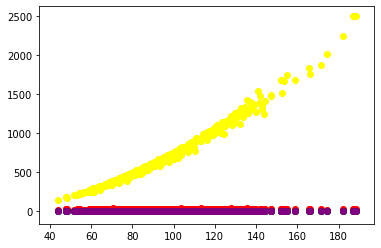

In [20]:
plt.scatter(df['perimeter_mean'], df['texture_mean'], c='r')
plt.scatter(df['perimeter_mean'], df['area_mean'], c='yellow')
plt.scatter(df['perimeter_mean'], df['smoothness_mean'], c='dodgerblue')
plt.scatter(df['perimeter_mean'], df['concavity_mean'], c='k')
plt.scatter(df['perimeter_mean'], df['symmetry_mean'], c='purple');

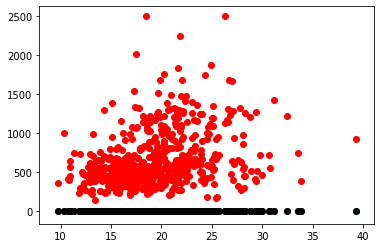

In [21]:
plt.scatter(df['texture_mean'], df['area_mean'], c='r')
plt.scatter(df['texture_mean'], df['smoothness_mean'], c='yellow')
plt.scatter(df['texture_mean'], df['concavity_mean'], c='dodgerblue')
plt.scatter(df['texture_mean'], df['symmetry_mean'], c='k');

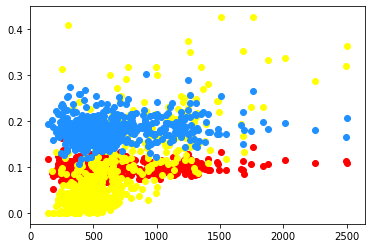

In [22]:
plt.scatter(df['area_mean'], df['smoothness_mean'], c='r')
plt.scatter(df['area_mean'], df['concavity_mean'], c='yellow')
plt.scatter(df['area_mean'], df['symmetry_mean'], c='dodgerblue');

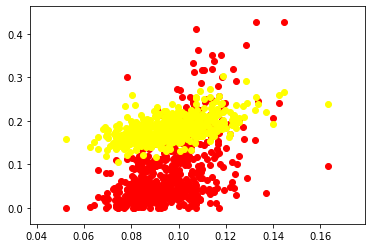

In [23]:
plt.scatter(df['smoothness_mean'], df['concavity_mean'], c='r')
plt.scatter(df['smoothness_mean'], df['symmetry_mean'], c='yellow');

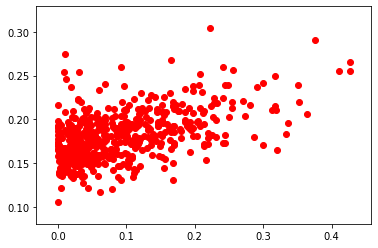

In [24]:
plt.scatter(df['concavity_mean'], df['symmetry_mean'], c='r');

In [25]:
# Check for nulls
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [26]:
# let's look closer at that unnamed column
df['Unnamed: 32'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [28]:
# Gross. Let's drop it.
df = df.drop('Unnamed: 32', axis=1)
# Also, for our purposes the id column is pointless so let's remove it for now
df = df.drop('id', axis=1)
print(df.head())
df.isnull().sum()

   radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

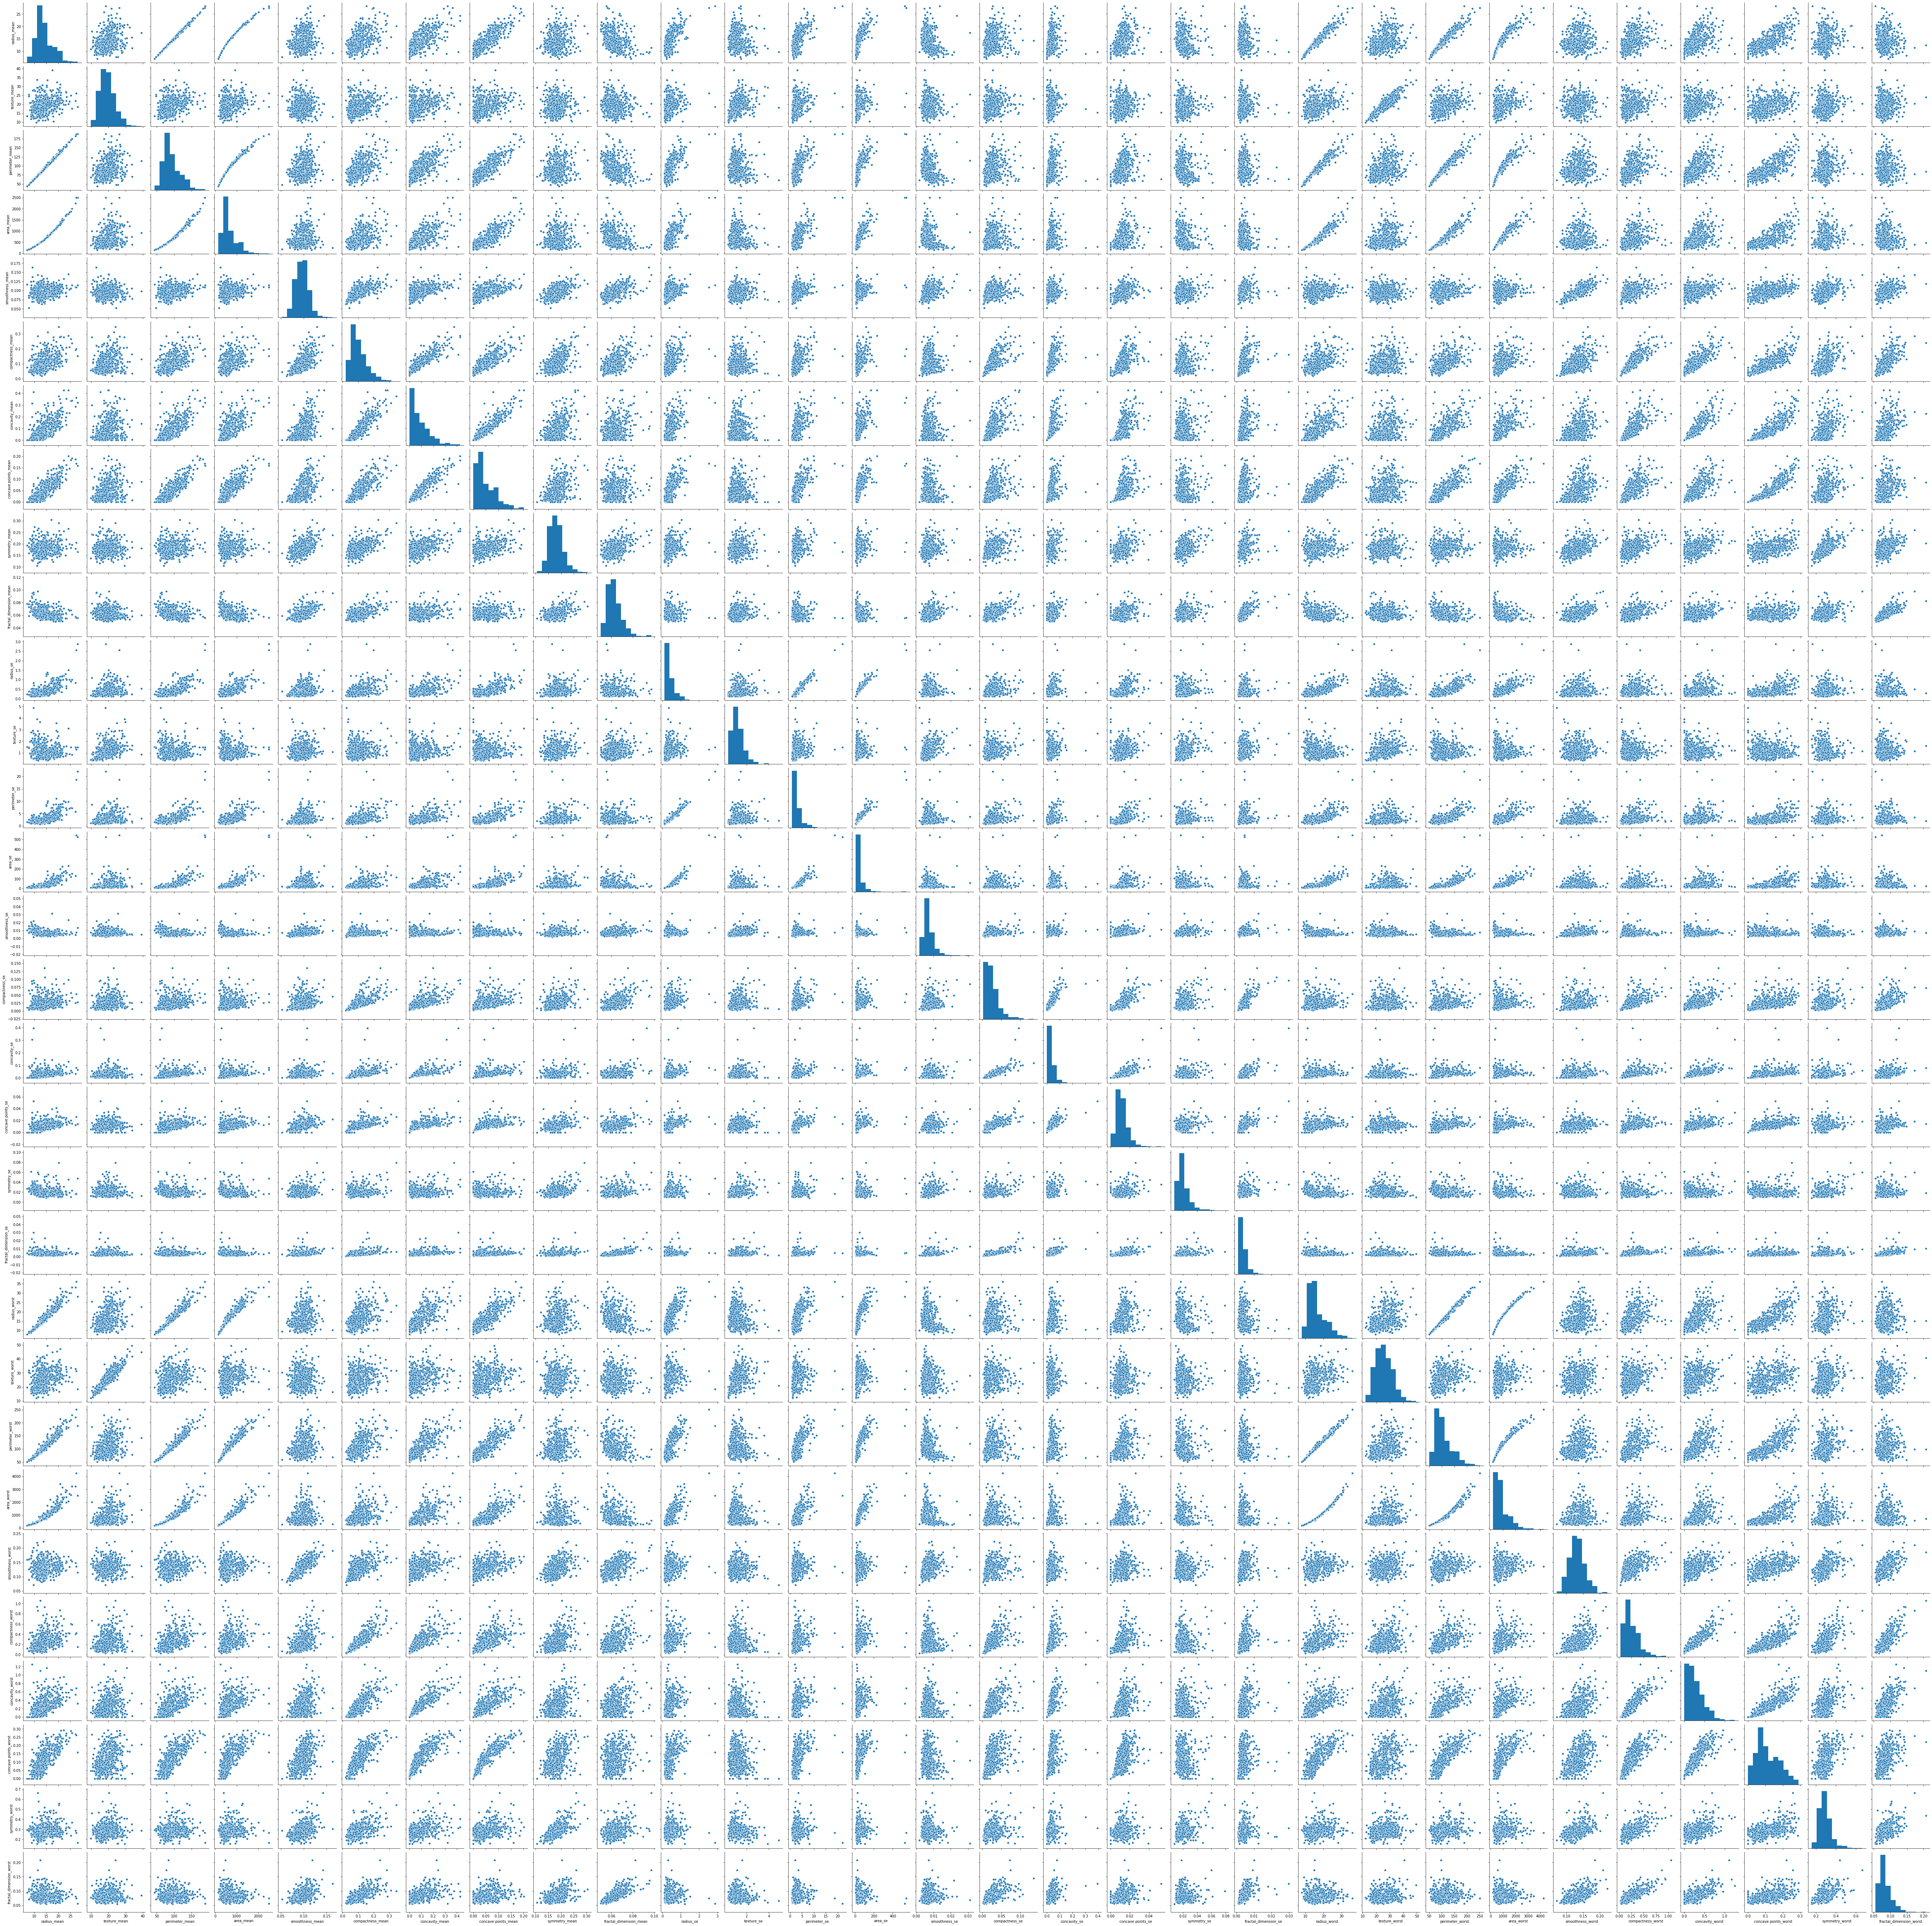

In [29]:
# Let's use seaborn plotting to get a decent look at a number of plots
import seaborn as sns
sns.pairplot(df)

In [0]:
# Now let's create our elbow graph!
sum_of_squared_distance = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df)
  sum_of_squared_distance.append(km.inertia_)

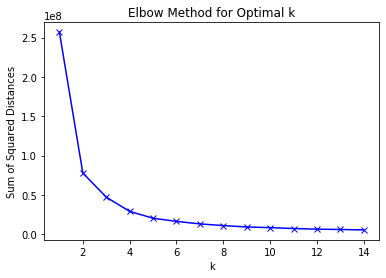

In [32]:
# Now plot our elbow graph
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [0]:
# According to the elbow graph the optimal k is going to be 2
# We also have a whole lot of columns to compare, so let's use PCA to bring that number down to 2
# Instantiate sklearn class
scaler = StandardScaler()

In [0]:
# Standardize dataset
scaled_data = scaler.fit_transform(df)

In [37]:
# Look at first five lists of data
scaled_data[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [38]:
# Create feature names to call into a future dataframe
features = list(df.columns)
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [39]:
# Now let's turn it back into a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=features)
df_scaled.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0     1.097064     -2.073335  ...        2.750622                 1.937015
1     1.829821     -0.353632  ...       -0.243890                 0.281190
2     1.579888      0.456187  ...        1.152255                 0.201391
3    -0.768909      0.253732  ...        6.046041                 4.935010
4     1.750297     -1.151816  ...       -0.868353                -0.397100

[5 rows x 30 columns]

In [40]:
# Check our means
df_scaled.mean()

radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16
area_worst                -2.848727e-17
smoothness_worst          -2.189227e-16


In [41]:
# Check our standard deviations
df_scaled.std()

radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concave points_mean        1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst            1.00088
concave points_worst       1.00088
symmetry_worst      

In [42]:
# Now apply PCA to our dataframe
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)
pca_features[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [43]:
# How much variance4 did each principal component explain?
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [44]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.6324320765155953

In [45]:
# How much information did we lose?
1 - sum(pca.explained_variance_ratio_)

0.3675679234844047

In [47]:
# Let's turn that into a dataframe
df_pca = pd.DataFrame(pca_features, columns=['comp_1', 'comp_1'])
df_pca.head()

comp_1     comp_1
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072

In [48]:
# For curiosity's sake let's change our n_components value
pca = PCA(n_components=7)
# Apply pca to data
pca_features = pca.fit_transform(df_scaled)
pca_features[:5]

array([[ 9.19283683,  1.94858307, -1.12316617,  3.63373194, -1.19510978,
         1.41142245,  2.15939353],
       [ 2.3878018 , -3.76817174, -0.52929268,  1.11826311,  0.62177473,
         0.02865769,  0.01334268],
       [ 5.73389628, -1.0751738 , -0.55174762,  0.91208228, -0.17708605,
         0.54145367, -0.66818717],
       [ 7.1229532 , 10.27558912, -3.23278957,  0.15254674, -2.96087853,
         3.05342354,  1.42988586],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063983,  0.54674757,
        -1.22649564, -0.93620052]])

In [52]:
# How much variance did each principal component explain?
print(pca.explained_variance_ratio_, '\n\n')
# How much total variance did we explain?
print(sum(pca.explained_variance_ratio_), '\n\n')
# How much information did we lose?
print(1 - sum(pca.explained_variance_ratio_))

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734] 


0.9100953006916699 


0.08990469930833012


In [54]:
# Turn that into a dataframe
df_pca = pd.DataFrame(pca_features, columns=['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7'])
df_pca.head()

comp_1     comp_2    comp_3    comp_4    comp_5    comp_6    comp_7
0  9.192837   1.948583 -1.123166  3.633732 -1.195110  1.411422  2.159394
1  2.387802  -3.768172 -0.529293  1.118263  0.621775  0.028658  0.013343
2  5.733896  -1.075174 -0.551748  0.912082 -0.177086  0.541454 -0.668187
3  7.122953  10.275589 -3.232790  0.152547 -2.960879  3.053424  1.429886
4  3.935302  -1.948072  1.389767  2.940640  0.546748 -1.226496 -0.936201

In [0]:
# We can clearly see that as we increase the n_components in our PCA we lose
# less and less of our data; however, we slowly begin to run into the same
# problem we had to begin with: too many columns.

In [0]:
# Now it's time to apply clustering to the data!
# Initialize instance of KMeans from sklearn
k = 2
model = KMeans(n_clusters=k, max_iter=1)

In [58]:
# Fit model to our sliced dataframe
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign predicted clusters back to dataframe
df_pca['cluster'] = model.labels_

In [0]:
# Get centroids
centroids = model.cluster_centers_

In [61]:
# Turn them into dataframe
cluster_centers = pd.DataFrame(centroids)
cluster_centers.head()

0         1         2         3         4         5        6
0  3.940181 -0.055025 -0.283124  0.039701  0.046422  0.017118 -0.07103
1 -2.339827  0.032676  0.168130 -0.023576 -0.027567 -0.010165  0.04218

In [0]:
# Set up colors for plotting
base_colors = ['gold', 'silver']
colors = [base_colors[centroid] for centroid in model.labels_]

Text(0.5, 1.0, 'Breast Cancer Clustering')

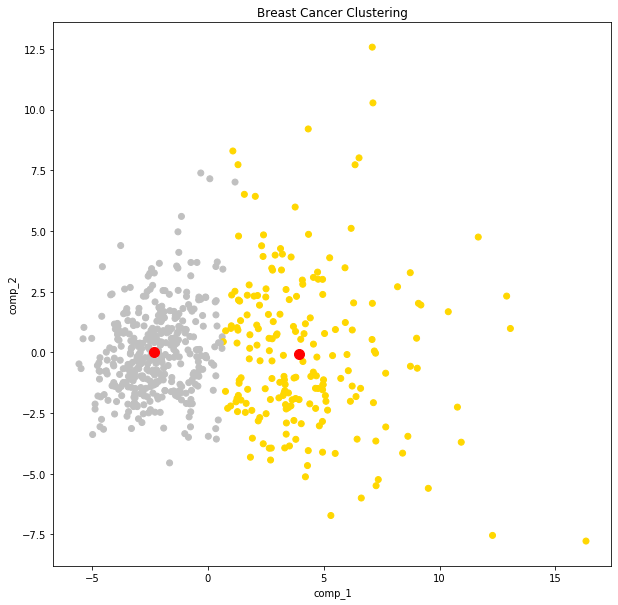

In [64]:
# Plot scatter of our points with calculated centroids
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_pca['comp_1'], df_pca['comp_2'], c=colors)
ax.scatter(cluster_centers[0], cluster_centers[1], c='r', s=100)
plt.xlabel('comp_1')
plt.ylabel('comp_2')
plt.title('Breast Cancer Clustering')

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project